In [1]:
from bioesag import BioEsAg as bio_
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from simulation import individual_simulation as sim_

2024-10-07 00:58:58.105275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 00:58:58.119684: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 00:58:58.124135: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-07 00:58:58.134447: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-07 00:58:58.902118: W tensorflow/compiler/tf2

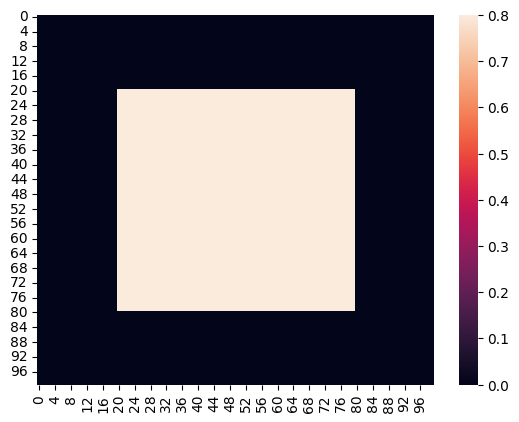

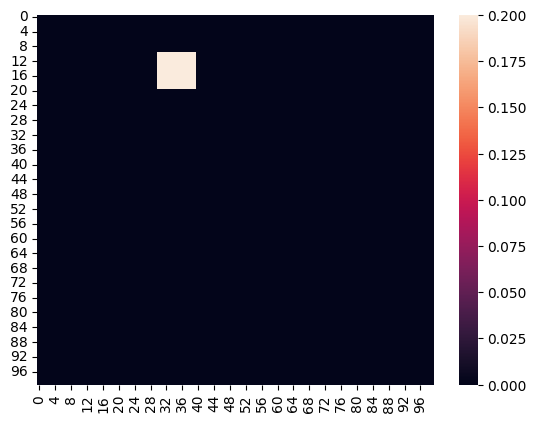

In [2]:
t = np.zeros((2, 100, 100))
t[1, 10:20, 30:40] = 0.2
t[0, 20:80, 20:80] = .8
sns.heatmap(t[0])
plt.show()
sns.heatmap(t[1])
plt.show()

ind_params = {"species_parameters":[(.36, .12, .6), (.2, .1, .4)],
              "pair_parameters":[(1.6, .3, .1, .17)]}
sim_params = {"max_simulation_epoch":200,
              "simulation_stop_time":20,
              "time_step": .2}

In [6]:
obj = bio_(target=t, population_size=50, individual_shape=(7, 100, 100), individual_parameters=ind_params,
                 simulation_parameters=sim_params, num_init_species=2, num_init_pairs=1,
                 store_path="/home/samani/Documents/sim/test/hhh/",
                 optimization_epochs=0, evolution_one_epochs=20, evolution_two_epochs=20,
                 learning_rate=0.001, sim_mutation_rate=0.1, compartment_mutation_rate=0.8, parameter_mutation_rate=0.1,
                 insertion_mutation_rate=0.05, deletion_mutation_rate=0.1, crossover_alpha=0.5,
                 checkpoint_interval=5, lr_decay=False, decay_steps=10000, decay_rate=0.98, trainable_compartment=2,
                 gradient_optimization=False, parameter_optimization=False, condition_optimization=False,
                 sim_mutation=True, compartment_mutation=True, param_mutation=True, species_insertion_mutation_one=True,
                 species_deletion_mutation_one=True, species_insertion_mutation_two=False, species_deletion_mutation_two=False,
                 compartment_crossover=True, param_crossover=True, sim_crossover=True,
                 individual_fix_shape=False, cost_alpha=0.6, cost_beta=0.4, cost_max_val=1.0, num_gradient_optimization=1,
                 num_saved_individuals=1, evolution_two_ratio=0.2, zoom_=True, zoom_in_factor=0.5, zoom_out_factor=2,
                 zoom_order=1, zoom_mode="constant", zoom_cval=0.0, zoom_grid_mode=False, num_elite_individuals=5,
                 sim_means=(5.0, 0.5), sim_std_devs=(100.0, 2.0), sim_min_vals=(5.0, 0.1), sim_max_vals=(100.0, 1.0),
                 compartment_mean=0.0, compartment_std=100.0, compartment_min_val=-1.0, compartment_max_val=1.0,
                 species_param_means=(0.0, 0.0, 0.0), species_param_stds=(10.0, 5.0, 10.0), species_param_min_vals=(-1.0, -1.0, -1.0),
                 species_param_max_vals=(1.0, 1.0, 1.0), complex_param_means=(0.0, 0.0, 0.0, 0.0),
                 complex_param_stds=(100.0, 10.0, 5.0, 10.0), complex_param_min_vals=(-1, -1, -1, -1), complex_param_max_vals=(1, 1, 1, 1),
                 param_distribution="uniform",  compartment_distribution="uniform", sim_distribution="uniform")

In [7]:
model = obj.fit()

--------------------------------------------------------
                   BioEsAg Algorithm                    
--------------------------------------------------------
              Evolutionary Optimization I               

Epoch 1/20, Avg/Min Population Cost: 0.10777/0.0557
Epoch 2/20, Avg/Min Population Cost: 0.11896/0.0557
Epoch 3/20, Avg/Min Population Cost: 0.13491/0.08222
Epoch 4/20, Avg/Min Population Cost: 0.12973/0.07868
Epoch 5/20, Avg/Min Population Cost: 0.10841/0.07868
Epoch 6/20, Avg/Min Population Cost: 0.10703/0.08132
Epoch 7/20, Avg/Min Population Cost: 1.05087/0.08132
Epoch 8/20, Avg/Min Population Cost: 1.51089/0.08801
there is no elite-individual !!!
Epoch 9/20, Avg/Min Population Cost: 0.20701/0.07711
Epoch 10/20, Avg/Min Population Cost: 0.33157/0.07949
Epoch 11/20, Avg/Min Population Cost: 0.22884/0.0841
Epoch 12/20, Avg/Min Population Cost: 0.19185/0.07634
Epoch 13/20, Avg/Min Population Cost: 0.13618/0.07634
Epoch 14/20, Avg/Min Population Cost: 0.11711/0.

In [5]:
del obj

In [12]:
data = h5py.File("/home/samani/Documents/sim/test/output_data.h5")

In [13]:
print(data.keys())

<KeysViewHDF5 ['elite_individual_1_evolution_one', 'elite_individual_2_evolution_one', 'elite_individual_3_evolution_one', 'evolution_costs_one', 'evolution_one_results', 'original_target', 'run_time', 'zoomed_in_target']>


In [16]:
ind1 = data["elite_individual_3_evolution_one"][:]
print(ind1.shape)

(3, 100, 100)


In [18]:
cost = data['evolution_costs_one'][:]
print(cost.shape)

(100, 5)


In [29]:
res_ = data['evolution_one_results'][:]
print(res_.shape)

(100, 100, 100)


<Axes: >

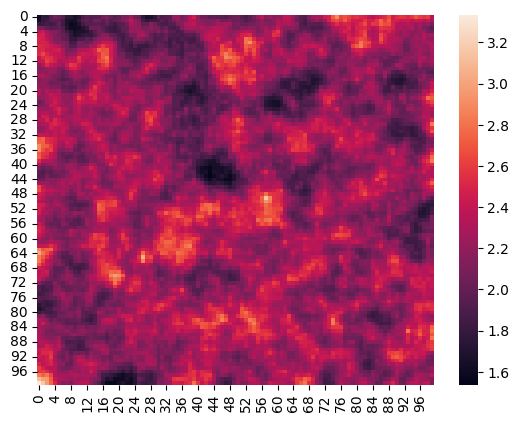

In [33]:
sns.heatmap(res_[30, :, :])

<Axes: >

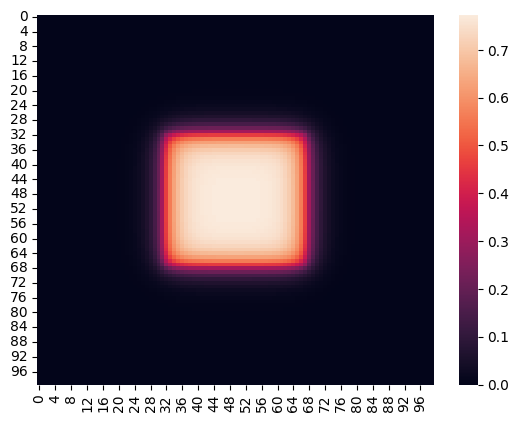

In [34]:
t = data['original_target']
sns.heatmap(t)

In [35]:
r = data['run_time'][:]
print(r)

[6.19969368e-02 3.95927950e+03 0.00000000e+00 4.76837158e-07]


In [6]:
def generate_complex_infinity_pattern(matrix_size=100, start_col=20, end_col=80, base_thickness=5, amplitude=5, frequency=5):
    # Create an empty matrix
    matrix = np.zeros((matrix_size, matrix_size))

    # Parametric equations for the infinity symbol (lemniscate of Bernoulli)
    t = np.linspace(0, 2 * np.pi, 1000)  # Parameter from 0 to 2pi

    # Infinity symbol parametric equations
    x = np.sin(t) / (1 + np.cos(t) ** 2)
    y = np.sin(t) * np.cos(t) / (1 + np.cos(t) ** 2)

    # Sinusoidal modulation for y-coordinates (adds complexity)
    y_modulation = amplitude * np.sin(frequency * t)
    y += y_modulation

    # Normalize x and y to fit the matrix dimensions and the required column range
    x_norm = np.interp(x, (x.min(), x.max()), (start_col, end_col))  # Normalize x from start to end col
    y_norm = np.interp(y, (y.min(), y.max()), (20, 80))  # Normalize y to stay within the central region of matrix

    # Plot the points on the matrix with varying thickness along the curve
    for i in range(len(t)):
        x_pos = int(x_norm[i])
        y_pos = int(y_norm[i])

        # Thickness modulation (varies thickness along the curve)
        thickness = int(base_thickness + 3 * np.sin(2 * np.pi * i / len(t)))

        # Ensure the thickness by drawing a small square around the current point
        matrix[max(0, y_pos-thickness//2):min(matrix_size, y_pos+thickness//2),
               max(0, x_pos-thickness//2):min(matrix_size, x_pos+thickness//2)] = 1

    return matrix


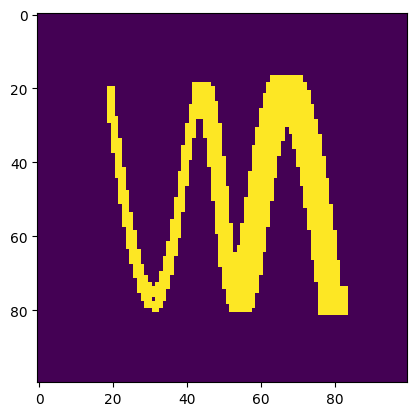

In [7]:

# Generate the complex pattern
t = generate_complex_infinity_pattern()

# Plot the matrix to visualize the more complex infinity symbol
plt.imshow(t)
plt.show()

In [8]:
ind = np.zeros((3, 100, 100))
ind[1, :, :] = t
ind[-1, 0, :3] = (1, .1, .9)
ind[-1, -1, :5] = (1, 0, 1000, 50, .2)
tt = sim_(ind)

<Axes: >

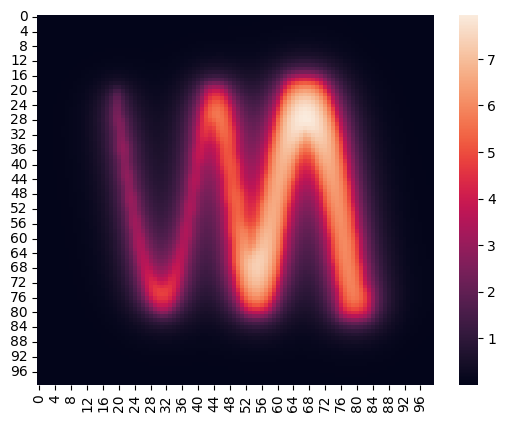

In [9]:
sns.heatmap(tt)

In [16]:
ind_params = {"species_parameters":[(1, .1, .9)],
              "pair_parameters":[(1.6, .3, .1, .17)]}
sim_params = {"max_simulation_epoch":1000,
              "simulation_stop_time":50,
              "time_step": .2}

In [17]:
obj = bio_(target=tt, population_size=100, individual_shape=(3, 100, 100), individual_parameters=ind_params,
                 simulation_parameters=sim_params,
                 store_path="/home/samani/Documents/sim/test/hhh/",
                 optimization_epochs=0, evolution_one_epochs=100, evolution_two_epochs=0,
                 learning_rate=0.001, sim_mutation_rate=0.1, compartment_mutation_rate=0.8, parameter_mutation_rate=0.1,
                 insertion_mutation_rate=0.04, deletion_mutation_rate=0.6, crossover_alpha=0.5,
                 checkpoint_interval=5, lr_decay=False, decay_steps=10000, decay_rate=0.98, trainable_compartment=1,
                 gradient_optimization=False, parameter_optimization=False, condition_optimization=False,
                 sim_mutation=True, compartment_mutation=True, param_mutation=True, species_insertion_mutation_one=True,
                 species_deletion_mutation_one=True, species_insertion_mutation_two=False, species_deletion_mutation_two=False,
                 compartment_crossover=True, param_crossover=True, sim_crossover=True,
                 individual_fix_shape=False, cost_alpha=0.6, cost_beta=0.4, cost_max_val=1.0, num_gradient_optimization=1,
                 num_saved_individuals=100, evolution_two_ratio=1, zoom_=False, zoom_in_factor=0.5, zoom_out_factor=2,
                 zoom_order=1, zoom_mode="constant", zoom_cval=0.0, zoom_grid_mode=False, num_elite_individuals=5,
                 sim_means=(5.0, 0.5), sim_std_devs=(100.0, 2.0), sim_min_vals=(5.0, 0.1), sim_max_vals=(100.0, 1.0),
                 compartment_mean=0.0, compartment_std=100.0, compartment_min_val=-1.0, compartment_max_val=1.0,
                 species_param_means=(0.0, 0.0, 0.0), species_param_stds=(10.0, 5.0, 10.0), species_param_min_vals=(-1.0, -1.0, -1.0),
                 species_param_max_vals=(1.0, 1.0, 1.0), complex_param_means=(0.0, 0.0, 0.0, 0.0),
                 complex_param_stds=(100.0, 10.0, 5.0, 10.0), complex_param_min_vals=(-1, -1, -1, -1), complex_param_max_vals=(1, 1, 1, 1),
                 param_distribution="uniform",  compartment_distribution="uniform", sim_distribution="uniform")

In [18]:
model = obj.fit()

--------------------------------------------------------
                   BioEsAg Algorithm                    
--------------------------------------------------------
              Evolutionary Optimization I               

(7, 100, 100)
100
Epoch 1/100, Avg/Min Population Cost: 4.00256/3.6458
(7, 100, 100)
100
Epoch 2/100, Avg/Min Population Cost: 3.73365/2.84289
(7, 100, 100)
100
Epoch 3/100, Avg/Min Population Cost: 3.55827/2.98294
(7, 100, 100)
100
Epoch 4/100, Avg/Min Population Cost: 3.41847/2.89298
(7, 100, 100)
100
Epoch 5/100, Avg/Min Population Cost: 3.61174/2.78213
(7, 100, 100)
100
Epoch 6/100, Avg/Min Population Cost: 3.51635/2.79753
(3, 100, 100)
100
Epoch 7/100, Avg/Min Population Cost: 3.45298/2.78788
(7, 100, 100)
100
Epoch 8/100, Avg/Min Population Cost: 3.39824/2.77519
(3, 100, 100)
100
Epoch 9/100, Avg/Min Population Cost: 3.68464/2.77519
(7, 100, 100)
100
Epoch 10/100, Avg/Min Population Cost: 4.44983/2.85671
there is no elite-individual !!!
(3, 100, 100)
100


/home/samani/Documents/projects/venv/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:253: RuntimeWarning: overflow encountered in multiply
  uxy = filter_func(im1 * im2, **filter_args)
/home/samani/Documents/projects/venv/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:256: RuntimeWarning: invalid value encountered in subtract
  vxy = cov_norm * (uxy - ux * uy)


there is no elite-individual !!!
(3, 100, 100)
100
Epoch 97/100, Avg/Min Population Cost: 3.38367/2.90365
(7, 100, 100)
100
Epoch 98/100, Avg/Min Population Cost: 3.40894/2.89292
(7, 100, 100)
100
Epoch 99/100, Avg/Min Population Cost: 3.45408/2.78799
(7, 100, 100)
100
Epoch 100/100, Avg/Min Population Cost: 3.46341/2.7544


In [15]:
del obj

NameError: name 'obj' is not defined

In [35]:
data = h5py.File("/home/samani/Documents/sim/test/hhh/output_data.h5")
data.close()

In [20]:
print(data.keys())

<KeysViewHDF5 ['elite_individual_100_evolution_one', 'elite_individual_10_evolution_one', 'elite_individual_11_evolution_one', 'elite_individual_12_evolution_one', 'elite_individual_13_evolution_one', 'elite_individual_14_evolution_one', 'elite_individual_15_evolution_one', 'elite_individual_16_evolution_one', 'elite_individual_17_evolution_one', 'elite_individual_18_evolution_one', 'elite_individual_19_evolution_one', 'elite_individual_1_evolution_one', 'elite_individual_20_evolution_one', 'elite_individual_21_evolution_one', 'elite_individual_22_evolution_one', 'elite_individual_23_evolution_one', 'elite_individual_24_evolution_one', 'elite_individual_25_evolution_one', 'elite_individual_26_evolution_one', 'elite_individual_27_evolution_one', 'elite_individual_28_evolution_one', 'elite_individual_29_evolution_one', 'elite_individual_2_evolution_one', 'elite_individual_30_evolution_one', 'elite_individual_31_evolution_one', 'elite_individual_32_evolution_one', 'elite_individual_33_evo

In [22]:
f = []
for i in range(1, 101):
    if data[f'elite_individual_{i}_evolution_one'].shape[0] > 3:
        f.append(data[f'elite_individual_{i}_evolution_one'])
print(f)

[<HDF5 dataset "elite_individual_9_evolution_one": shape (7, 100, 100), type "<f8">, <HDF5 dataset "elite_individual_27_evolution_one": shape (7, 100, 100), type "<f8">, <HDF5 dataset "elite_individual_49_evolution_one": shape (7, 100, 100), type "<f8">]


In [32]:
el = f[2]
print(el[-1, 0, :3])
print(el[-1, 2, :3])
print(el[-2, 0, :2])
print(el[-2, 1, :4])
print(el[-1, -1, :5])

[0.91937637 0.6301695  0.82292209]
[0.53601272 0.11356867 0.22559909]
[0. 2.]
[0.17838581 0.52900741 0.10278303 0.16141692]
[2.0000000e+00 1.0000000e+00 1.0000000e+03 4.5899242e+01 1.5000000e-01]


In [33]:
s = sim_(el[:])

<Axes: >

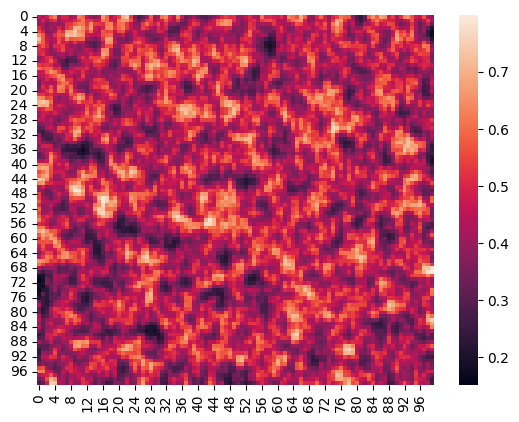

In [34]:
sns.heatmap(s)

In [1]:
import h5py
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from simulation import individual_simulation as sim_
from optimize import AdamOptimization as aopt
import tensorflow as tf


# Disable all GPU devices
tf.config.set_visible_devices([], 'GPU')



2024-10-07 12:07:16.790605: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 12:07:16.804314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 12:07:16.808506: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-07 12:07:16.818242: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-07 12:07:17.510079: W tensorflow/compiler/tf2

In [4]:
data = h5py.File("/home/samani/Documents/projects/master_project/model/results/model_6/output_data.h5", "a")
print(data.keys())

<KeysViewHDF5 ['elite_individual_100_evolution_one', 'elite_individual_10_evolution_one', 'elite_individual_11_evolution_one', 'elite_individual_12_evolution_one', 'elite_individual_13_evolution_one', 'elite_individual_14_evolution_one', 'elite_individual_15_evolution_one', 'elite_individual_16_evolution_one', 'elite_individual_17_evolution_one', 'elite_individual_18_evolution_one', 'elite_individual_19_evolution_one', 'elite_individual_1_evolution_one', 'elite_individual_20_evolution_one', 'elite_individual_21_evolution_one', 'elite_individual_22_evolution_one', 'elite_individual_23_evolution_one', 'elite_individual_24_evolution_one', 'elite_individual_25_evolution_one', 'elite_individual_26_evolution_one', 'elite_individual_27_evolution_one', 'elite_individual_28_evolution_one', 'elite_individual_29_evolution_one', 'elite_individual_2_evolution_one', 'elite_individual_30_evolution_one', 'elite_individual_31_evolution_one', 'elite_individual_32_evolution_one', 'elite_individual_33_evo

In [13]:
inds = []
for i in range(1, 101):
    for key in data.keys():
        if key == f"elite_individual_{i}_evolution_one" and data[key].shape[0] == 7:
            inds.append(data[key][:])

In [14]:
print(len(inds))

3


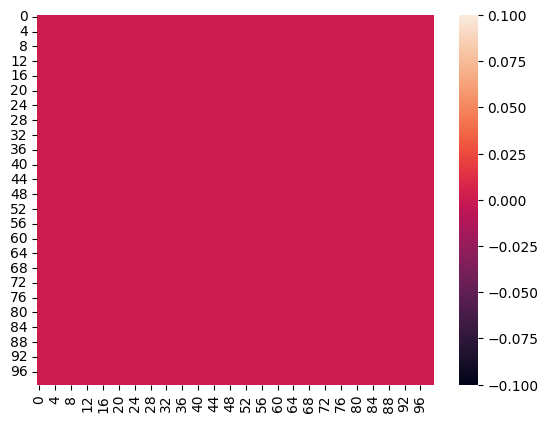

[0.9117122  0.53547274 0.79890479]
[0.99306828 0.8142243  0.8142243 ]
[0.88764608 0.96024466 0.88764608 0.88764608]
[2.00000000e+00 1.00000000e+00 1.00000000e+03 7.45280936e+01
 5.02978683e-01]
[0. 2.]


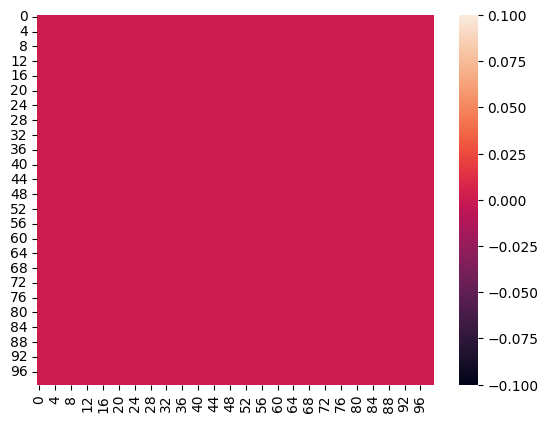

[0.94795841 0.79259829 0.82696147]
[0.28895957 0.47983943 0.29071432]
[0.36775762 0.28163477 0.33659919 0.08914259]
[2.00000000e+00 1.00000000e+00 1.00000000e+03 7.35366674e+01
 1.61810588e-01]
[0. 2.]


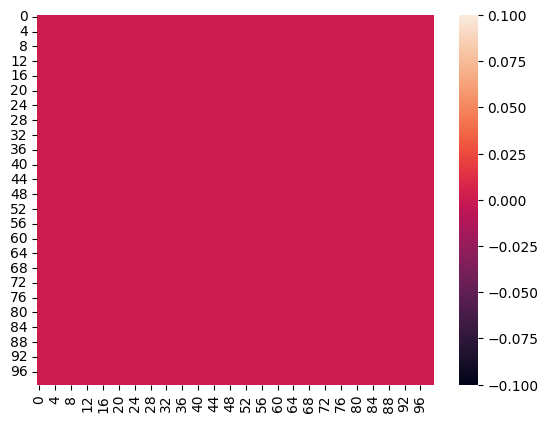

[0.91937637 0.6301695  0.82292209]
[0.53601272 0.11356867 0.22559909]
[0.17838581 0.52900741 0.10278303 0.16141692]
[2.0000000e+00 1.0000000e+00 1.0000000e+03 4.5899242e+01 1.5000000e-01]
[0. 2.]


In [15]:
for ind in inds:
    sns.heatmap(ind[0, :, :])
    plt.show()
    print(ind[-1, 0, :3])
    print(ind[-1, 2, :3])
    print(ind[-2, 1, :4])
    print(ind[-1, -1, :5])
    print(ind[-2, 0, :2])

In [16]:
inds_ = []
for ind in inds:
    inds_.append(sim_(ind, 1))

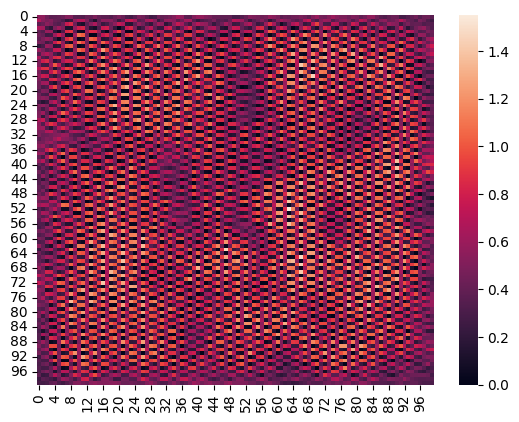

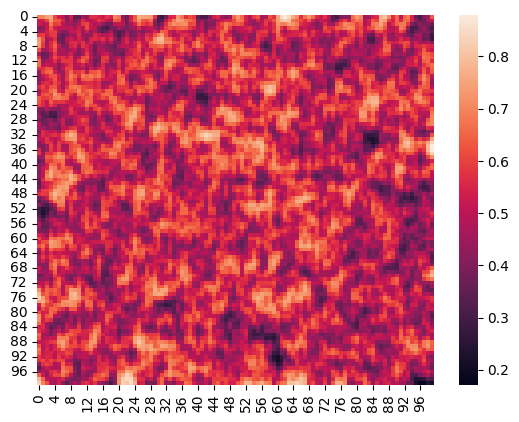

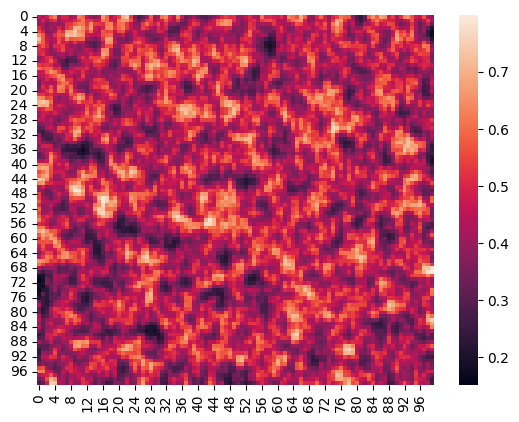

In [19]:
for ind in inds_:
    sns.heatmap(ind[0])
    plt.show()

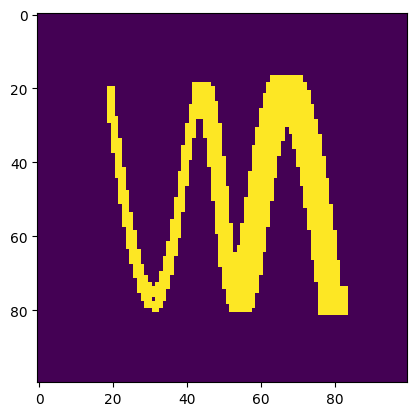

In [25]:
def generate_complex_infinity_pattern(matrix_size=100, start_col=20, end_col=80, base_thickness=5, amplitude=5, frequency=5):
    # Create an empty matrix
    matrix = np.zeros((matrix_size, matrix_size))

    # Parametric equations for the infinity symbol (lemniscate of Bernoulli)
    t = np.linspace(0, 2 * np.pi, 1000)  # Parameter from 0 to 2pi

    # Infinity symbol parametric equations
    x = np.sin(t) / (1 + np.cos(t) ** 2)
    y = np.sin(t) * np.cos(t) / (1 + np.cos(t) ** 2)

    # Sinusoidal modulation for y-coordinates (adds complexity)
    y_modulation = amplitude * np.sin(frequency * t)
    y += y_modulation

    # Normalize x and y to fit the matrix dimensions and the required column range
    x_norm = np.interp(x, (x.min(), x.max()), (start_col, end_col))  # Normalize x from start to end col
    y_norm = np.interp(y, (y.min(), y.max()), (20, 80))  # Normalize y to stay within the central region of matrix

    # Plot the points on the matrix with varying thickness along the curve
    for i in range(len(t)):
        x_pos = int(x_norm[i])
        y_pos = int(y_norm[i])

        # Thickness modulation (varies thickness along the curve)
        thickness = int(base_thickness + 3 * np.sin(2 * np.pi * i / len(t)))

        # Ensure the thickness by drawing a small square around the current point
        matrix[max(0, y_pos-thickness//2):min(matrix_size, y_pos+thickness//2),
               max(0, x_pos-thickness//2):min(matrix_size, x_pos+thickness//2)] = 1

    return matrix
t = generate_complex_infinity_pattern()

# Plot the matrix to visualize the more complex infinity symbol
plt.imshow(t)
plt.show()


In [26]:
ind2 = np.zeros((3, 100, 100))
ind2[1, :, :] = t
ind2[-1, 0, :3] = (1, .1, .9)
ind2[-1, -1, :5] = (1, 0, 1000, 50, .2)
tt = sim_(ind2, 1)

In [42]:
for ind in inds:
    ind[3, :, :] = np.random.rand(100, 100)*.5

<Axes: >

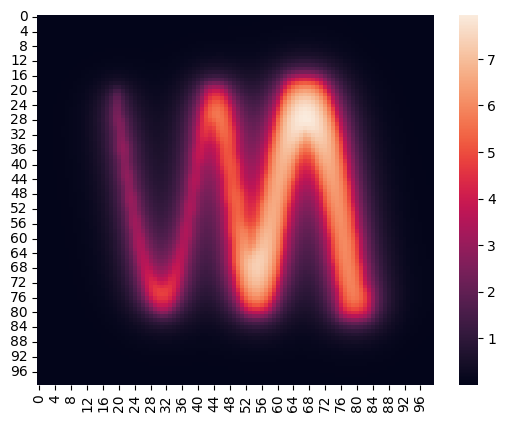

In [43]:
sns.heatmap(tt[0, :, :])

In [52]:
individual = tf.convert_to_tensor(inds[-1])
target = tf.convert_to_tensor(tt)

In [45]:
print(individual.shape)
print(target.shape)

(7, 100, 100)
(100, 100)


<Axes: >

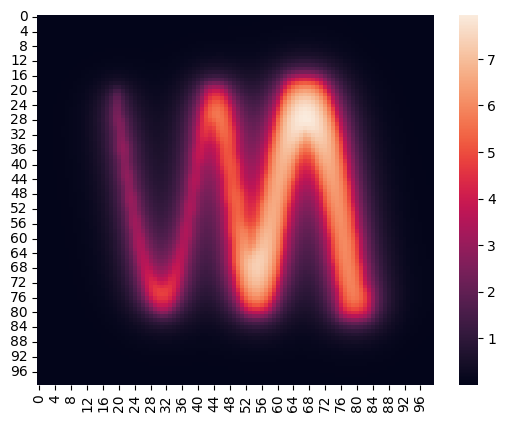

In [48]:
sns.heatmap(target)

In [53]:
obj = aopt(target=target,
           path="",
           file_name="out",
           epochs=100,
           learning_rate=[0.01],
           param_opt=False,
           compartment_opt=True,
           cost_alpha=0.9,
           cost_beta=0.9,
           max_val=1.0,
           checkpoint_interval=5,
           lr_decay=False,
           decay_steps=40,
           decay_rate=0.6,
           trainable_compartment=1)

In [54]:
model = obj.gradient_optimization(individual)

2024-10-07 11:59:23.950118: W external/local_tsl/tsl/framework/bfc_allocator.cc:482] Allocator (GPU_0_bfc) ran out of memory trying to allocate 546.9KiB (rounded to 560128)requested by op TensorScatterUpdate
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-10-07 11:59:23.952007: I external/local_tsl/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-10-07 11:59:23.952052: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 51746, Chunks in use: 51745. 12.63MiB allocated for chunks. 12.63MiB in use in bin. 393.9KiB client-requested in use in bin.
2024-10-07 11:59:23.952075: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 1332, Chunks in use: 1332. 666.0KiB allocated for chunks. 666.0KiB in use in bin. 509.9KiB client-requested in use in b